In [46]:
import numpy as np
from skimage import io
from heapq import heappush, heappop
import matplotlib
from collections import deque
import time

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


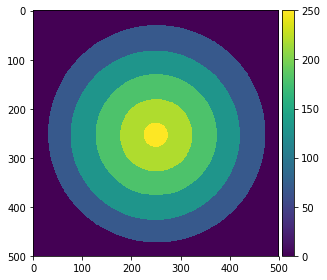

In [140]:
image_data_2d = np.fromfile('circles.raw', dtype=np.uint8)
image_data_2d = image_data_2d.reshape(500, 500).astype(float)

io.imshow(image_data_2d)
io.show()

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


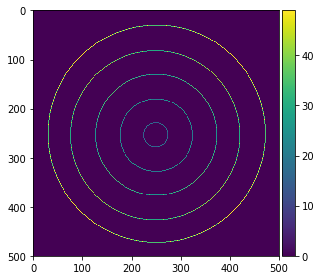

In [141]:
grad = np.gradient(image_data_2d)
grad = np.array([
        np.linalg.norm((x, y)) for x, y in zip(grad[0].ravel(),grad[1].ravel())
    ]).reshape(image_data_2d.shape).astype(np.int32)

io.imshow(grad)
io.show()

## 2D watershed with a priority queue

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


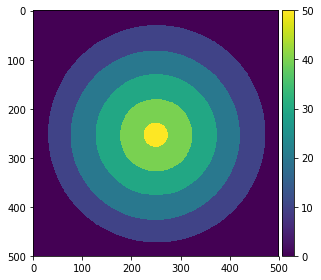

Time: 2.0664732456207275


In [146]:
# 2D algos shared variables.
keypoints = [(0,250), (75,250), (125,250), (175,250), (210,250), (250,250)]
shifts = [(0,1),(0,-1),(1,0),(-1,0)]
w = image_data_2d.shape[0]
h = image_data_2d.shape[1]

start_time = time.time()

pq = []
visited = np.zeros(image_data_2d.shape).astype(np.bool)
result = np.zeros(image_data_2d.shape).astype(np.int)

# Initializing.
for label, kp in enumerate(keypoints):
    heappush(pq, (grad[kp], label * 10, kp))
    visited[kp] = True
    result[kp] = label * 10
    
# Working.
while len(pq) != 0:
    level, label, point = heappop(pq)
    
    for shift in shifts:
        new_point = (point[0] + shift[0], point[1] + shift[1])
        if new_point[0] < 0 or new_point[0] > w-1 or new_point[1] < 0 or new_point[1] > h-1:
            continue
        if visited[new_point]:
            continue
        visited[new_point] = True
        result[new_point] = label
        heappush(pq, (grad[new_point], label, new_point))
    

# The result.
io.imshow(result, cmap=matplotlib.cm.viridis)
io.show()

print("Time:", time.time() - start_time)

## 2D watershed with a hierarchy of queues

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


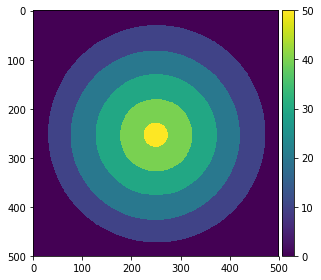

Time: 1.7868680953979492


In [144]:
grad = grad.astype(np.int)

start_time = time.time()

qq = [deque() for x in range(np.max(grad) + 10)]
visited = np.zeros(image_data_2d.shape).astype(np.bool)
result = np.zeros(image_data_2d.shape).astype(np.int)

# Initializing.
for label, kp in enumerate(keypoints):
    qq[grad[kp]].append((label * 10, kp))
    visited[kp] = True
    result[kp] = label * 10
    
# Working.
while True:
    stop = False
    q_number = -1
    for i in range(len(qq)):
        if i == len(qq)-1 and len(qq[i]) == 0:
            stop = True
        if len(qq[i]) != 0:
            q_number = i
            break
    if stop:
        break
    
    label, point = qq[q_number].popleft()
    
    for shift in shifts:
        new_point = (point[0] + shift[0], point[1] + shift[1])
        if new_point[0] < 0 or new_point[0] > w-1 or new_point[1] < 0 or new_point[1] > h-1:
            continue
        if visited[new_point]:
            continue
        visited[new_point] = True
        result[new_point] = label
        qq[grad[new_point]].append((label, new_point))

# The result.
io.imshow(result, cmap=matplotlib.cm.viridis)
io.show()

print("Time:", time.time() - start_time)